<a href="https://colab.research.google.com/github/shobhittya/deeplearning/blob/main/MesoNET_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!pip install pydot

In [16]:
!pip install pydotplus

In [17]:
import os, datetime

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model

from PIL import Image
import matplotlib.pyplot as plt

import pydotplus
import pydot

In [18]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [19]:
!pip install opendatasets --upgrade --quiet

In [20]:
import opendatasets as od

In [21]:
od.version()

'0.1.20'

In [22]:
dataset_url = "https://www.kaggle.com/xhlulu/140k-real-and-fake-faces"

In [23]:
od.download(dataset_url)

Skipping, found downloaded files in "./140k-real-and-fake-faces" (use force=True to force download)


In [24]:
import os

In [33]:
base_dir = "/content/140k-real-and-fake-faces/real_vs_fake/real-vs-fake"
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
valid_dir = os.path.join(base_dir, 'valid')

In [34]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)


In [35]:
train_generator = train_datagen.flow_from_directory(train_dir, batch_size=100, class_mode='binary', target_size=(150, 150))

validation_generator = valid_datagen.flow_from_directory(valid_dir, batch_size=100, class_mode='binary', target_size=(150, 150))

test_generator = test_datagen.flow_from_directory(test_dir, batch_size=100, class_mode='binary', target_size=(150, 150))

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


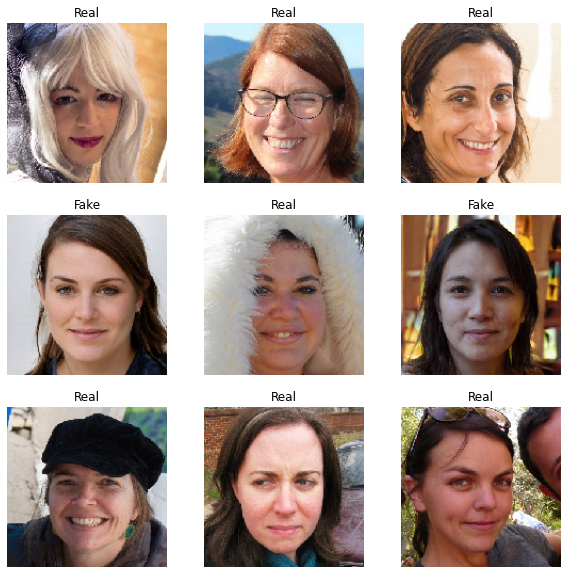

In [36]:
plt.figure(figsize=(10, 10))
for i in range(9):
    img, label = train_generator.next()
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(img[0])
    if(label[0] == 0.0):
        plt.title("Fake")
    else:
        plt.title("Real")
    plt.axis("off")

**Model Architecture**

In [39]:
model = tf.keras.models.Sequential(
    [
     tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape = (150,150,3)),
     tf.keras.layers.MaxPooling2D(2,2),

     tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),

     tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),

     tf.keras.layers.Flatten(),

     tf.keras.layers.Dense(1064, activation='relu'),
     tf.keras.layers.Dense(2, activation='softmax')
    ]
)

**Visualizing network architectures**

In [42]:
tf.keras.utils.pydot = pydot

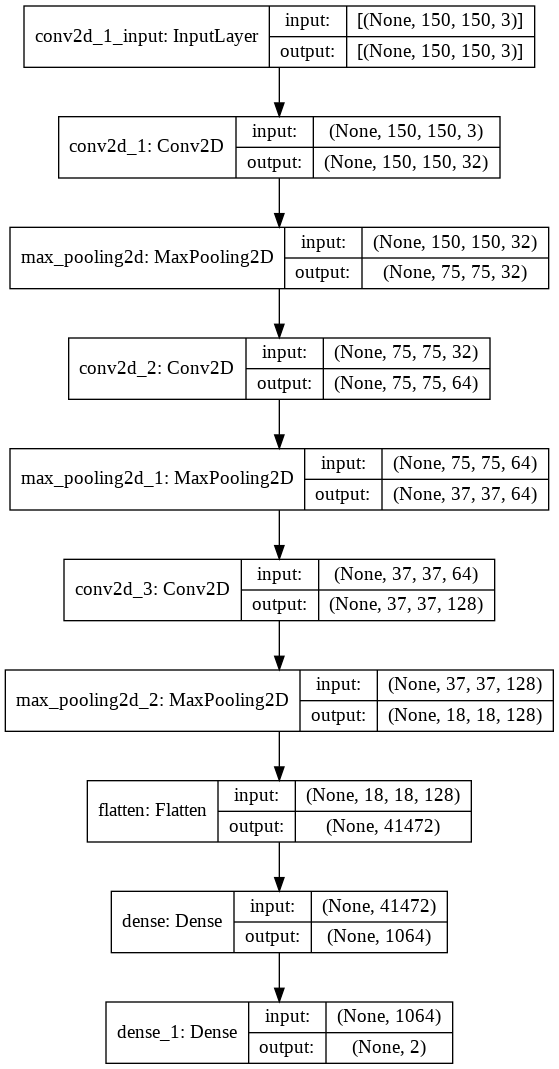

In [43]:
plot_model(model, to_file='model.png', show_shapes=True)

**Model Summary**

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0

**Train Model**

In [54]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [55]:
%%time
history = model.fit(train_generator, validation_data = validation_generator, epochs = 10, validation_steps = 100, verbose=1)

Epoch 1/10
1000/1000 [==============================] - 313s 282ms/step - loss: 0.5525 - accuracy: 0.7213 - val_loss: 0.4417 - val_accuracy: 0.7928
Epoch 2/10
1000/1000 [==============================] - 291s 291ms/step - loss: 0.3374 - accuracy: 0.8525 - val_loss: 0.3265 - val_accuracy: 0.8574
Epoch 3/10
1000/1000 [==============================] - 270s 270ms/step - loss: 0.1970 - accuracy: 0.9205 - val_loss: 0.1902 - val_accuracy: 0.9235
Epoch 4/10
1000/1000 [==============================] - 268s 268ms/step - loss: 0.1097 - accuracy: 0.9574 - val_loss: 0.1786 - val_accuracy: 0.9319
Epoch 5/10
1000/1000 [==============================] - 269s 268ms/step - loss: 0.0589 - accuracy: 0.9779 - val_loss: 0.1838 - val_accuracy: 0.9392
Epoch 6/10
1000/1000 [==============================] - 267s 267ms/step - loss: 0.0370 - accuracy: 0.9865 - val_loss: 0.1968 - val_accuracy: 0.9392
Epoch 7/10
1000/1000 [==============================] - 268s 268ms/step - loss: 0.0254 - accuracy: 0.9910 - val_

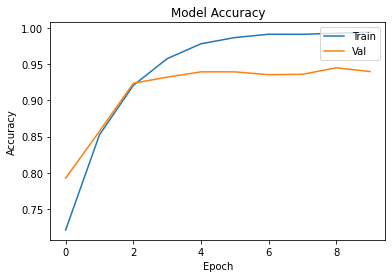

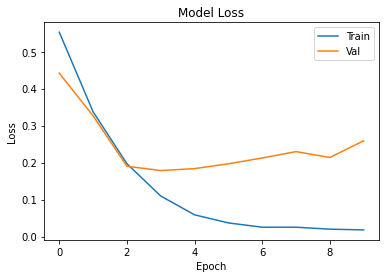

In [56]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)

173/200 [========================>.....] - ETA: 7s - loss: 0.2560 - accuracy: 0.9368

In [ ]:
import numpy as np
from keras.preprocessing import image

# test_image = image.load_img('E:/Machine Learning Series/Datasets/archive/real_vs_fake/real-vs-fake/test/real/00461.jpg', target_size=(150, 150, 3))
test_image = image.load_img('../input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/test/real/00056.jpg', target_size=(150, 150, 3))

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
test_generator.class_indices

print(result)

In [ ]:
print(
    "This image is {} with a {:.2f} percentage."
    .format(class_names[np.argmax(result)], 100 * np.max(result))
)